## Fetching Dataset

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', version=1)

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X,y=mnist["data"], mnist["target"]

In [5]:
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

In [7]:
%matplotlib inline

In [8]:
import matplotlib
import matplotlib.pyplot as plt

In [9]:
import numpy as np

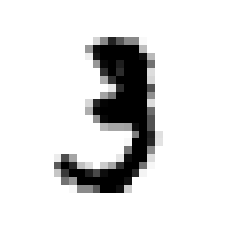

In [10]:
some_digit=X.iloc[10]
some_digit_image = some_digit.values.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [11]:
y[10]

'3'

## Test-Train split

In [12]:
x_train, x_test, y_train, y_test= X[:60000], X[60000:], y[:60000], y[60000:]

## 3 detector

In [13]:
y_train=y_train.astype(np.int8)
y_test=y_test.astype(np.int8)
y_train_3=(y_train==3)
y_test_3=(y_test==3)

In [14]:
y_train_3[10]

True

## Training a SGDCLassifier

In [15]:
from sklearn.linear_model import SGDClassifier

In [16]:
sgd_clf=SGDClassifier(random_state=42)

In [17]:
sgd_clf.fit(x_train, y_train_3)

SGDClassifier(random_state=42)

In [18]:
sgd_clf.predict([some_digit])

C:\Users\shrish shrinath vaid\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

## Accuracy using Cross-Validation

In [19]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [20]:
skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

In [21]:
for train_index, test_index in skfolds.split(x_train, y_train_3):
    clone_clf = clone(sgd_clf)
    x_train_folds = x_train.iloc[train_index]
    y_train_folds = y_train_3[train_index]
    x_test_fold = x_train.iloc[test_index]
    y_test_fold = y_train_3[test_index]
    clone_clf.fit(x_train_folds, y_train_folds)
    y_pred = clone_clf.predict(x_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9505
0.9649
0.9687


## Precision Recall

In [22]:
from sklearn.model_selection import cross_val_score, cross_val_predict
y_train_pred=cross_val_score(sgd_clf, x_train, y_train_3, cv=3)

In [23]:
y_train_pred

array([0.9496 , 0.9624 , 0.96275])

In [24]:
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_3, cv=3)

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
confusion_matrix(y_train_3, y_train_pred)

array([[53477,   392],
       [ 2113,  4018]], dtype=int64)

In [27]:
# recall or true positive rate: : this is the ratio of positive instances that are correctly detected by the classifier
# precision : interesting one to look at is the accuracy of the positive predictions
# Precision attempts to answer the following question: What proportion of positive identifications was actually correct?
# Precision can be seen as a measure of quality, and recall as a measure of quantity. Higher precision means that an algorithm returns more relevant results than irrelevant ones, and high recall means that an algorithm returns most of the relevant results 

In [28]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_3, y_train_pred)

0.9111111111111111

In [29]:
 recall_score(y_train_3, y_train_pred)

0.655358016636764

In [30]:
# F1 score is the harmonic mean of precision and recall

In [31]:
from sklearn.metrics import f1_score
f1_score(y_train_3, y_train_pred)
  

0.7623565126648326

In [32]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

C:\Users\shrish shrinath vaid\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([1378.05599034])

In [33]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [34]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [35]:
y_scores = cross_val_predict(sgd_clf, x_train, y_train_3, cv=3,
method="decision_function")

In [36]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_3, y_scores)

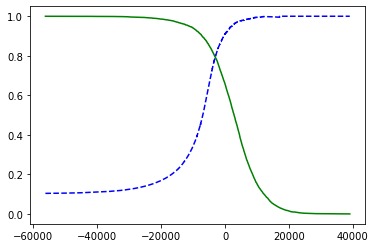

In [37]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    [...] # highlight the threshold, add the legend, axis label and grid
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [38]:
threshold_92_precision = thresholds[np.argmax(precisions >= 0.92)]
y_train_pred_92 = (y_scores >= threshold_92_precision)


In [39]:
precision_score(y_train_3, y_train_pred_92)

0.9200284765068818

In [40]:
 recall_score(y_train_3, y_train_pred_92)

0.6323601370086446

## MultiClass Classification

In [41]:
 from sklearn.svm import SVC

In [42]:
svm_clf = SVC()

In [44]:
svm_clf.fit(x_train, y_train)

SVC()

In [45]:
svm_clf.predict([some_digit])

C:\Users\shrish shrinath vaid\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([3], dtype=int8)

In [46]:
some_digit_scores = svm_clf.decision_function([some_digit])

C:\Users\shrish shrinath vaid\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [47]:
some_digit_scores


array([[ 2.73719174,  6.20651629,  3.81372559,  9.32009109,  0.69223349,
         6.26207869, -0.31019599,  1.69984884,  8.29382546,  6.23989726]])

In [50]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(x_train, y_train)

ovr_clf.predict([some_digit])

C:\Users\shrish shrinath vaid\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\shrish shrinath vaid\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\shrish shrinath vaid\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\shrish shrinath vaid\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\shrish shrinath vaid\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featu

array([3], dtype=int8)

## Data Scaling

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 

In [54]:
x_train_scaled = scaler.fit_transform(x_train.astype(np.float64))

In [56]:
cross_val_score(sgd_clf, x_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

In [64]:
y_predicted=sgd_clf.predict(x_test)

In [71]:
f1_score(y_test, y_predicted, average="weighted")

0.0185641063668213

## Errors

In [58]:
y_train_pred = cross_val_predict(sgd_clf, x_train_scaled, y_train, cv=3)

In [59]:
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]],
      dtype=int64)

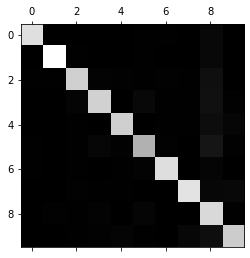

In [60]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()


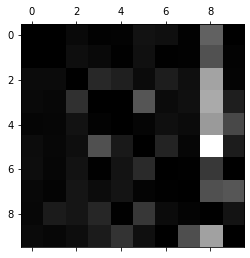

In [61]:
# getting the error rates:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

